In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1) Import required libraries**

In [2]:
!pip install -U efficientnet
!pip install -q pyyaml h5py
!pip install -U git+https://github.com/qubvel/efficientnet

     |████████████████████████████████| 50 kB 2.7 MB/s 
  Cloning https://github.com/qubvel/efficientnet to /tmp/pip-req-build-ydmsflax
  Running command git clone -q https://github.com/qubvel/efficientnet /tmp/pip-req-build-ydmsflax


In [3]:
import os
import cv2
import zipfile
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras import backend as K
import seaborn as sns
import efficientnet.tfkeras as efn
from tensorflow.keras import Model 
from tensorflow.keras import layers 
from tensorflow.keras.applications.resnet50 import ResNet50

import math
import datetime
import platform

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [4]:
tf.__version__

'2.7.0'

**2) Data loading and exploration**

In [5]:
fpath = "/content/drive/MyDrive/datasets"
random_seed = 111

categories = os.listdir(fpath)
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['Viral Pneumonia', 'covid negative', 'covid positive'] 

No. of categories =  3


In [6]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category)[:]:
            file_ext = image_name.split(".")[-1]
            if (file_ext.lower() == "jpg") or (file_ext.lower() == "jpeg") or (file_ext.lower() == "png"):
                print(f"\nCategory = {category}, Image name = {image_name}") 
                img = cv2.imread(fpath+"/"+category+"/"+image_name)
                #print(img)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                #print(img)
                img_array = Image.fromarray(img, 'RGB')
                #print(img_array)
                #resize image to 299 x 299 because the input image resolution for vggNet is 299 x 299
                resized_img = img_array.resize((150, 150))
                #print(resized_img)
                img_lst.append(np.array(resized_img))

                labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

Streaming output truncated to the last 5000 lines.
Category = covid positive, Image name = COVID-556.png

Category = covid positive, Image name = COVID-561.png

Category = covid positive, Image name = COVID-555.png

Category = covid positive, Image name = COVID-559.png

Category = covid positive, Image name = COVID-565.png

Category = covid positive, Image name = COVID-560.png

Category = covid positive, Image name = COVID-566.png

Category = covid positive, Image name = COVID-563.png

Category = covid positive, Image name = COVID-56.png

Category = covid positive, Image name = COVID-557.png

Category = covid positive, Image name = COVID-553.png

Category = covid positive, Image name = COVID-558.png

Category = covid positive, Image name = COVID-576.png

Category = covid positive, Image name = COVID-568.png

Category = covid positive, Image name = COVID-57.png

Category = covid positive, Image name = COVID-570.png

Category = covid positive, Image name = COVID-573.png

Category = covid

In [7]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [8]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (7316, 150, 150, 3) 
Labels shape =  (7316,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Training data shape :  (7316, 150, 150, 3) (7316,)
Total number of outputs :  3
Output classes :  [0 1 2]


Text(0.5, 1.0, 'Leaf : 0')

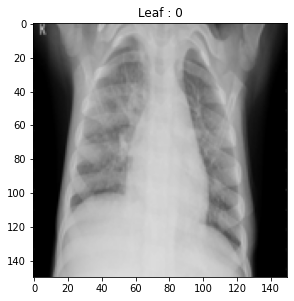

In [9]:
print('Training data shape : ', images.shape,labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(images[25,:,:], cmap='gray')
plt.title("Leaf : {}".format(labels[25]))



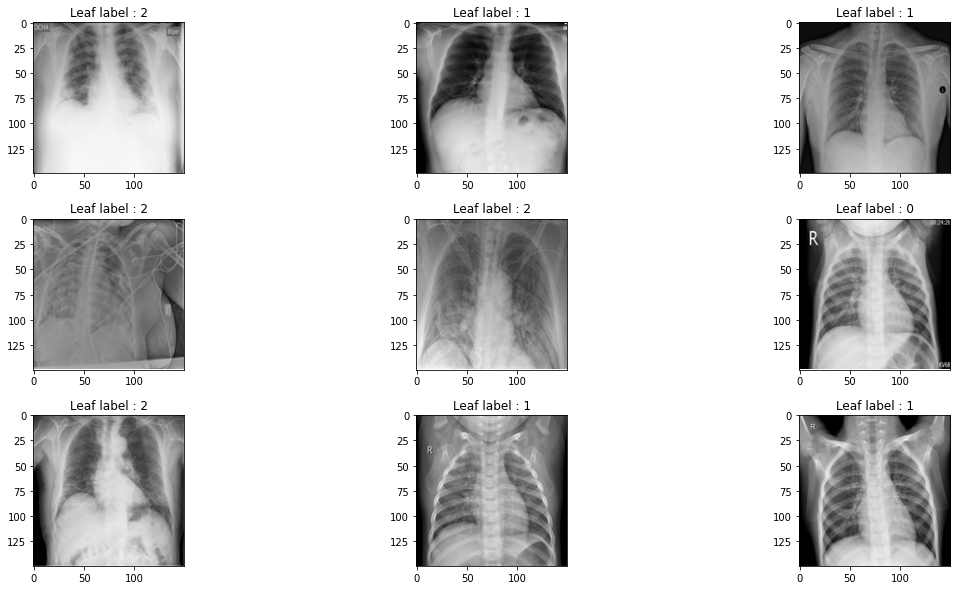

In [10]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        #plt.figure(figsize=[10,5])

        plt.title('Leaf label : {}'.format(labels[r[0]]))
#        plt.xticks([])
#       plt.yticks([])
      
    plt.show()
    
display_rand_images(images, labels)

**3) Prepare data for CNN model training**

Step 1 - shuffle the data loaded from the dataset

In [11]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
#print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
#print("\n'n' values after shuffling = ",n)

In [12]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (7316, 150, 150, 3) 
Labels shape after shuffling =  (7316,)


Step 2 - Data normalization

In [13]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (7316, 150, 150, 3)


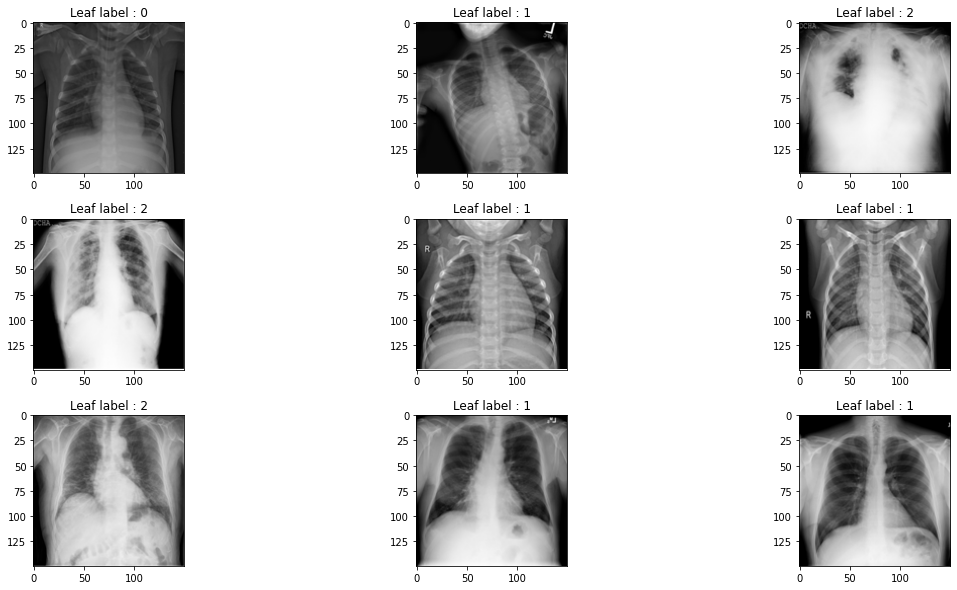

In [14]:
display_rand_images(images, labels)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state=random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("\ny_test shape = ",y_test.shape)



x_train shape =  (5852, 150, 150, 3)
y_train shape =  (5852,)

x_test shape =  (1464, 150, 150, 3)

y_test shape =  (1464,)


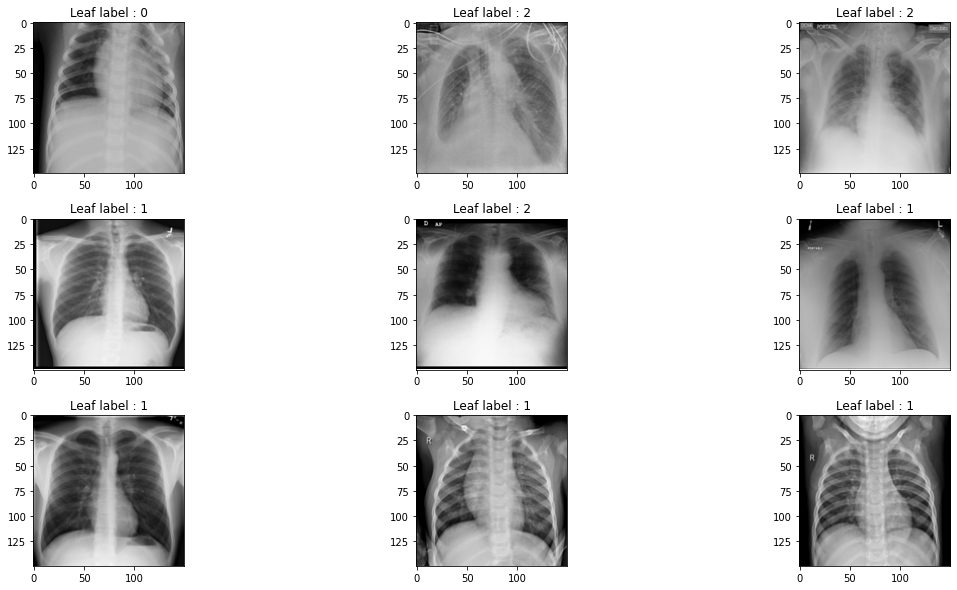

In [16]:
display_rand_images(x_train, y_train)

**4) Define CNN model (AlexNet)**

In [17]:
from tensorflow.keras.layers import (
    BatchNormalization
)

In [18]:
def prtrainedModel(model, shape):
  model_dict= {
      'b0' : efn.EfficientNetB0(include_top=False, weights='imagenet',input_shape=shape),
      'b1' : efn.EfficientNetB1(include_top=False, weights='imagenet',input_shape=shape),
      'b2' : efn.EfficientNetB2(include_top=False, weights='imagenet',input_shape=shape),
      'b3' : efn.EfficientNetB3(include_top=False, weights='imagenet',input_shape=shape),
      'b4' : efn.EfficientNetB4(include_top=False, weights='imagenet',input_shape=shape),
      'b5' : efn.EfficientNetB5(include_top=False, weights='imagenet',input_shape=shape),
      'b6' : efn.EfficientNetB6(include_top=False, weights='imagenet',input_shape=shape),
      'b7' : efn.EfficientNetB7(include_top=False, weights='imagenet',input_shape=shape)
  }

  return model_dict[model]

In [19]:
def create_model():
  base_model = prtrainedModel('b4', (150, 150, 3))
  # base_model.trainable= False
  x= Flatten()(base_model.output)
  x = Dense(1024, activation='relu')(x)
  x = Dropout(.1)(x)
  x = Dense(512, activation='relu')(x)
  x = Dropout(.1)(x)
  x = Dense(128, activation='relu')(x)
  x = Dropout(.05)(x)
  x = Dense(64, activation='relu')(x)
  x = Dense(32, activation='relu')(x)
  x = Dense(16, activation='relu')(x)
  output=Dense(3,activation='softmax')(x) # because we have to predict the AUC
  model=Model(base_model.input,output)
  
  return model

model = create_model()
model.summary()

258449408/258434480 [==============================] - 22s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 75, 75, 48)   1296        ['input_5[0][0]']                
                                                                                                  
 stem_bn (BatchNormalization)   (None, 75, 75, 48)   192         ['stem_conv[0][0]']              
                                                                                                  
 stem_activation (Activati

In [20]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Accuracy

In [21]:
hist= model.fit(x_train, y_train, epochs=15)

Epoch 1/15
183/183 [==============================] - 186s 776ms/step - loss: 0.3866 - accuracy: 0.8700
Epoch 2/15
183/183 [==============================] - 139s 762ms/step - loss: 0.1537 - accuracy: 0.9539
Epoch 3/15
183/183 [==============================] - 139s 762ms/step - loss: 0.1244 - accuracy: 0.9629
Epoch 4/15
183/183 [==============================] - 140s 763ms/step - loss: 0.0937 - accuracy: 0.9713
Epoch 5/15
183/183 [==============================] - 139s 760ms/step - loss: 0.0995 - accuracy: 0.9694
Epoch 6/15
183/183 [==============================] - 140s 765ms/step - loss: 0.0778 - accuracy: 0.9762
Epoch 7/15
183/183 [==============================] - 139s 759ms/step - loss: 0.0409 - accuracy: 0.9884
Epoch 8/15
183/183 [==============================] - 139s 761ms/step - loss: 0.1385 - accuracy: 0.9590
Epoch 9/15
183/183 [==============================] - 139s 761ms/step - loss: 0.1206 - accuracy: 0.9668
Epoch 10/15
183/183 [==============================] - 140s 762m

In [22]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

46/46 [==============================] - 12s 197ms/step - loss: 0.1982 - accuracy: 0.9624
0.19822248816490173 0.9624316692352295


Validation Accuracy

In [23]:
history = model.fit(
    x_train,
    y_train,
    epochs=5,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_test, y_test)
)

Epoch 1/5
183/183 [==============================] - 148s 809ms/step - loss: 0.0377 - accuracy: 0.9911 - val_loss: 0.1597 - val_accuracy: 0.9658
Epoch 2/5
183/183 [==============================] - 148s 808ms/step - loss: 0.0327 - accuracy: 0.9916 - val_loss: 0.1244 - val_accuracy: 0.9529
Epoch 3/5
183/183 [==============================] - 147s 805ms/step - loss: 0.0167 - accuracy: 0.9949 - val_loss: 0.1433 - val_accuracy: 0.9706
Epoch 4/5
183/183 [==============================] - 147s 804ms/step - loss: 0.0281 - accuracy: 0.9932 - val_loss: 0.0996 - val_accuracy: 0.9795
Epoch 5/5
183/183 [==============================] - 148s 806ms/step - loss: 0.0162 - accuracy: 0.9954 - val_loss: 0.0935 - val_accuracy: 0.9768


In [24]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

46/46 [==============================] - 8s 177ms/step - loss: 0.0935 - accuracy: 0.9768
0.09349308162927628 0.9767759442329407


Display few random images with actual vs predicted values of labels

In [26]:
pred = model.predict(x_test)
pred.shape

(1464, 3)

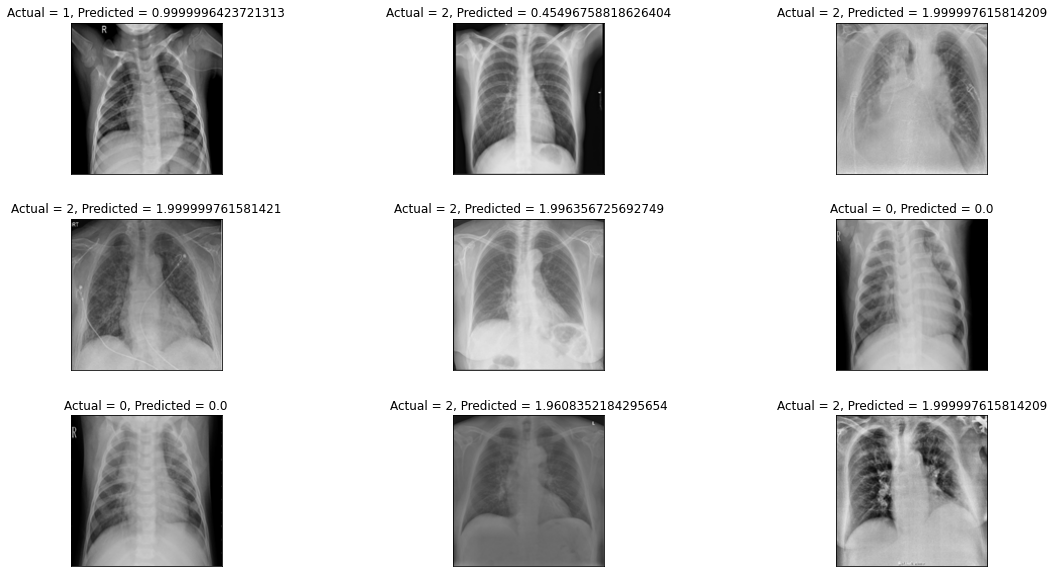

In [27]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

**Accuracy Graph**

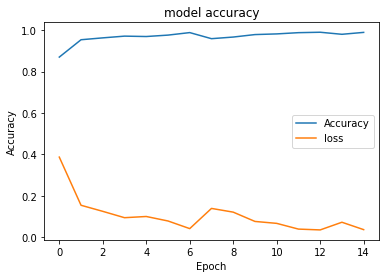

In [28]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])

plt.plot(hist.history['loss'])

plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","loss"])
plt.show()

**7) Confusion matrix**

In [29]:
import matplotlib.pyplot as plt
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       246
           1       0.99      0.96      0.97       653
           2       0.96      0.99      0.98       565

    accuracy                           0.98      1464
   macro avg       0.98      0.98      0.98      1464
weighted avg       0.98      0.98      0.98      1464

Confusion Matrix
[[244   2   0]
 [  7 624  22]
 [  0   3 562]]


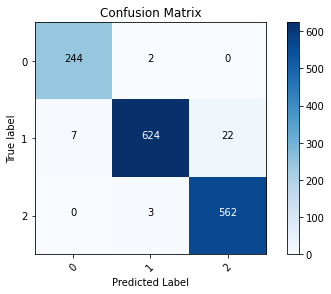

In [30]:
import itertools

cm = confusion_matrix(y_test, y_pred= np.argmax(pred,axis=-1))
print(classification_report(y_test, np.argmax(pred,axis=-1)))
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap = plt.cm.Blues,model_name="name"):
    plt.imshow(cm,interpolation='nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        com = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion Matrix")
    print(cm)
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment = 'center',
                 color = "white" if cm[i,j]>thresh else "black")
        plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')
    plt.savefig("cm"+model_name+".jpg", dpi=600, bbox_inches='tight')
    plt.savefig("cm"+model_name+".png", dpi=300, bbox_inches='tight')
plot_confusion_matrix(cm,classes, title="Confusion Matrix",model_name="Efficientnet")

8) Save trained model, weights


In [33]:
# save model in JSON format
model_json = model.to_json()
json_file = open("/content/drive/MyDrive/Colab Notebooks/model1.json", "w")
json_file.write(model_json)
print("Model saved in JSON format!")
    
# save training weights in h5 file
model.save_weights("/content/drive/MyDrive/thesis/model1.h5")
print("\nModel weights saved!")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Model saved in JSON format!

Model weights saved!


**Convert To tflite**

In [ ]:
import tensorflow as tf

#model = tf.keras.models.load_model('/content/drive/MyDrive/thesis/model1.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("model1.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpahcova5x/assets


**Convert To tflite**

In [ ]:
# save model in tflite
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
from google.colab import files
files.download('model.tflite')
